# Aprendizaje Automático

## Tarea 2

Profesor: MSc. Felipe Meza.

Instituto Tecnológico de Costa Rica, 

Medio de entrega: TecDigital.

Entregables: El entregable consiste en el url de la notebook Tarea-2.ipynb en GITHUB. 

Grupo de trabajo:
- Manuel Calderón
- Ernesto Rivera

---
Objetivo: El objetivo de la Tarea 2 consiste en elegir un dataset, ejecutar las diferentes tareas de pre-procesado y crear un tutorial sobre el uso de PANDAS.


Para el siguiente tutorial se aplicarán una serie de pasos con el fin de explicar un ejemplo de pre-procesado:


## Paso 1: Descargar el dataset

Lo primero que se debe realizar es la selección del dataset a trabajar.
Para descargar el dataset, vaya a [este link](https://www.kaggle.com/philipjames11/dark-net-marketplace-drug-data-agora-20142015) y descargue el archivo "Agora.csv".

Es necesario ir a la página pues esta requiere que uno se inscriba para poder descargar el dataset.


## Paso 2: Importar bibliotecas

Una vez descargado el archivo, colóquelo en la misma carpeta donde se encuetra este documento de jupyter para poder proceder a su lectura.

Antes que nada, vamos a cargar algunas bibliotecas que vamos a ir usando posteriormente.

In [1]:
import numpy as np
import pandas as pd

## Paso 3: Cargar los datos
En nuestro caso utilizaremos PANDAS para leer el archivo.

In [2]:
df = pd.read_csv("Agora.csv")


## Paso 4: Primeras exploraciones de los datos

Algo muy importante es la visualización inicial de los datos, por lo que para este paso, se deben imprimir los datos cargados (o al menos parte de ellos), imprimir sus columnas en caso de tener alguna, caso contrario ver el paso 4, y ver cualquier dato de cargado que nos pueda ser relevante para verificar el estado de la data.

Para nuestro caso usaremos un head(visualiza las primeras 5 filas), y un describe para visualizar el análisis de pandas de la data.

In [3]:
df.head()

,Vendor,Category,Item,Item Description,Price,Origin,Destination,Rating,Remarks
0,CheapPayTV,Services/Hacking,12 Month HuluPlus gift Code,12-Month HuluPlus Codes for $25. They are wort...,0.05027025666666667 BTC,Torland,NaN,4.96/5,NaN
1,CheapPayTV,Services/Hacking,Pay TV Sky UK Sky Germany HD TV and much mor...,Hi we offer a World Wide CCcam Service for En...,0.152419585 BTC,Torland,NaN,4.96/5,NaN
2,KryptykOG,Services/Hacking,OFFICIAL Account Creator Extreme 4.2,Tagged Submission Fix Bebo Submission Fix Adju...,0.007000000000000005 BTC,Torland,NaN,4.93/5,NaN
3,cyberzen,Services/Hacking,VPN > TOR > SOCK TUTORIAL,How to setup a VPN > TOR > SOCK super safe enc...,0.019016783532494728 BTC,NaN,NaN,4.89/5,NaN
4,businessdude,Services/Hacking,Facebook hacking guide,. This guide will teach you how to hack Faceb...,0.062018073963963936 BTC,Torland,NaN,4.88/5,NaN


In [4]:
df.describe()

,Vendor,Category,Item,Item Description,Price,Origin,Destination,Rating,Remarks
count,109689,109689,109687,109662,109684,99807,60528,109674,12616
unique,3192,109,107601,69526,102682,404,1196,478,5
top,optiman,Drugs/Cannabis/Weed,1g MDMA,[----- Terms & Conditions -----] -YOU MUST RE...,1.0 BTC,USA,USA,5.00/5,Average price may be skewed outliar > .5 BTC f...
freq,881,21272,18,264,74,33729,14664,19637,12612



Tenemos 109689 filas, o entradas de datos.

Se puede inferir que tenemos dos tipos de dados, según la columna:
- De tipo texto (string): vendor, category, item, description, origin, destination, remarks
- De tipo numérico: price, rating


## Paso 5: Explorando las diferentes columnas

Un caso interesante es la columna remarks, que contiene 5 valores únicos.
¡Vamos a explorarlos!

Para ello, tomamos el dataset original, y se obtienen los nombres de las columnas

In [5]:
df.columns

Index(['Vendor', ' Category', ' Item', ' Item Description', ' Price',
       ' Origin', ' Destination', ' Rating', ' Remarks'],
      dtype='object')

Dada la naturaleza del dataset, la mayoría de los nombres de las columnas inician con un espacio en blanco.

Seleccionamos la columna _Remarks_ y se calcula sus valores únicos:

In [6]:
df[" Remarks"].unique()

array([nan, 'Average price may be skewed outliar > .5 BTC found',
       '4.91/5', '4.90/5', '4.41/5', '[0 deals]'], dtype=object)

Como nada es perfecto, parece que tenemos ciertos datos _Rating_ en la columna de _Remarks_.

Erroes comunes en el dataset:
- Comillas dobles ('"') faltantes, lo causa que una sola entrada contenga la información que debió ser de muchas entradas
- Comas (',') de más. Dando problemas la lectura, pues la entrada contiene _más columnas_ de las necesarias.

El archivo contiene 110610 records, muchos más de los enumerados en la [página del dataset](https://www.kaggle.com/philipjames11/dark-net-marketplace-drug-data-agora-20142015) que dice 107603.

Con un poco de magia de python, vamos a corregir los errores.

Un detalle en el siguiente código es el uso de **wb** como _modo_ para el archivo destino, esto se usa por que el archivo contiene caracteres fuera del mapping tradicional, tales como '♔' o '⚜'.

## Pase 6: Eliminar errores del archivo

El siguiente código genera una copia del archivo original llamada _Agora2.csv_, el cual usaremos de ahora en adelante.

In [7]:
with open("Agora2.csv", "wb") as nuevoArchivo: # trunca el archivo si ya existe
    with open("Agora.csv", mode="r", encoding="UTF-8", errors="ignore") as archivoOriginal:
        numero = 1
        for linea in archivoOriginal:
            try:
                # se corrigen los errores encontrados
                linea2 = linea.replace("\"This Listing Is For Verified", "This Listing Is For Verified")
                linea2 = linea2.replace("\"This subtropical", "This subtropical")
                linea2 = linea2.replace("\"This po", "This po")
                linea2 = linea2.replace("\"Mr. H", "Mr. H")
                linea2 = linea2.replace("\"An engaging", "An engaging")
                linea2 = linea2.replace(",\"Professional F", ",Professional F")
                linea2 = linea2.replace(",\"Professional D", ",Professional D")
                linea2 = linea2.replace("SKU:90183\"", "SKU:90183")
                linea2 = linea2.replace("\"Encryption", "Encryption")
                linea2 = linea2.replace("\"ProSoma", "ProSoma")
                linea2 = linea2.replace("\"If you’", "If you’")
                linea2 = linea2.replace(",\"Named", "Named")
                linea2 = linea2.replace(",\"THC", ",THC")
                linea2 = linea2.replace("\"Strassman'", "Strassman'")
                linea2 = linea2.replace("\"You d", "You d")
                linea2 = linea2.replace(",\"This is your", ",This is your")
                linea2 = linea2.replace("35,\"P", "35,P")
                linea2 = linea2.replace("wing,\"", "wing,")
                linea2 = linea2.replace("22,\"I", "22,I")
                linea2 = linea2.replace(",\"G13", ",G13")
                linea2 = linea2.replace("0,\"Pl", "0,Pl")
                linea2 = linea2.replace("s Sunglasses Replica are 1:1  ...", "s Sunglasses Replica are 1:1 ...\"")
                linea2 = linea2.replace("],,,,", "],")
                linea2 = linea2.replace(",David Icke (", ",\"David Icke (")
                linea2 = linea2.replace("r Bud,I", "r Bud,\"I")
                linea2 = linea2.replace("hone,B", "hone,\"B")
                linea2 = linea2.replace("h,I r", "h,\"I r")
                linea2 = linea2.replace(".,0.01547", ".\",0.01547")
                linea2 = linea2.replace("~5/5,,", "~5/5,")
                linea2 = linea2.replace(".,2.32555", ".\",2.32555")
                linea2 = linea2.replace("/5,,", "/5,")
                linea2 = linea2.replace(".,0.130088", ".\",0.130088")
                linea2 = linea2.replace("tazepam,", "tazepam\",")
                linea2 = linea2.replace("E,15.8", "E\",15.8")
                linea2 = linea2.replace("Quality\"\" we've all come to know and love. This MD ...\",1",
                                       "Quality we've all come to know and love. This MD ...,1")
                
                # se almacena el texto en el nuevo archivo
                linea2 = linea2.encode("utf-8")
                nuevoArchivo.write(linea2)
            except Exception as e:
                print("Error con el string", numero, linea, e)
                raise e
            finally:
                numero += 1


Cargamos el archivo, esta vez utilizando el nuevo sin errores.

In [8]:
df2 = pd.read_csv("Agora2.csv")
df2.describe()

,Vendor,Category,Item,Item Description,Price,Origin,Destination,Rating,Remarks
count,110610,110610,110609,110584,110606,100594,61014,110597,12691
unique,3191,108,108492,69992,103476,401,1202,477,1
top,optiman,Drugs/Cannabis/Weed,1g MDMA,[----- Terms & Conditions -----] -YOU MUST RE...,1.0 BTC,USA,USA,5.00/5,Average price may be skewed outliar > .5 BTC f...
freq,885,21727,18,264,74,34023,14790,19823,12691


## Paso 7: Eliminar outliers 

Los datos outliers son datos que son muy diferentes al resto de los valores. En el caso de este dataset, dichos datos fueron marcados en la columna de Remarks.

In [9]:
df2[" Remarks"].unique()

array([nan, 'Average price may be skewed outliar > .5 BTC found'],
      dtype=object)

In [10]:
df2 = df2[df2[" Remarks"] != "Average price may be skewed outliar > .5 BTC found"]
df2

,Vendor,Category,Item,Item Description,Price,Origin,Destination,Rating,Remarks
0,CheapPayTV,Services/Hacking,12 Month HuluPlus gift Code,12-Month HuluPlus Codes for $25. They are wort...,0.05027025666666667 BTC,Torland,NaN,4.96/5,NaN
1,CheapPayTV,Services/Hacking,Pay TV Sky UK Sky Germany HD TV and much mor...,Hi we offer a World Wide CCcam Service for En...,0.152419585 BTC,Torland,NaN,4.96/5,NaN
2,KryptykOG,Services/Hacking,OFFICIAL Account Creator Extreme 4.2,Tagged Submission Fix Bebo Submission Fix Adju...,0.007000000000000005 BTC,Torland,NaN,4.93/5,NaN
3,cyberzen,Services/Hacking,VPN > TOR > SOCK TUTORIAL,How to setup a VPN > TOR > SOCK super safe enc...,0.019016783532494728 BTC,NaN,NaN,4.89/5,NaN
4,businessdude,Services/Hacking,Facebook hacking guide,. This guide will teach you how to hack Faceb...,0.062018073963963936 BTC,Torland,NaN,4.88/5,NaN
...,...,...,...,...,...,...,...,...,...
110605,gonz324,Drugs/Opioids/Opium,1 gr purified Opium,This Listing is for a gramm of redefined Opium...,0.14363729 BTC,Germany,NaN,4.91/5,NaN
110606,cheqdropz,Weapons/Fireworks,Shipping Ticket,in order for me to ship one of the guns you bo...,0.08680555 BTC,USA,NaN,[0 deals],NaN
110607,SnowQueen,Drugs/Opioids/Opium,0.50 GRAMS #4 White Afghani Heroin - FULL ESCROW,0.50 grams #4 White Afghani Heroin SnowQueen...,0.33641201 BTC,Canada,Worldwide,[0 deals],NaN
110608,SnowQueen,Drugs/Opioids/Opium,1.0 GRAMS #4 White Afghani Heroin - FULL ESCROW,1.0 grams #4 White Afghani Heroin SnowQueen ...,0.61165820 BTC,Canada,Worldwide,[0 deals],NaN



## Paso 8: Eliminar columnas no relevantes

Una vez leído el archivo, se puede proceder a eliminar las columnas que no nos aportan ninguna información relevante, ya sea porque están completamente vacías o porque realmente no es requerida para la información que se desea visualizar. Para esto, podríamos usar el método **dropna(axis=1, how='all')**. Sin embargo, este dataset no tiene columnas sin datos.

Entonces mejor usamos **drop(["nombre_columna"], axis=1)** para eliminar la columna de _Remarks_ dado que no aporta información relevante.

In [11]:
df2 = df2.drop([" Remarks", " Item Description", " Origin", " Destination"], axis=1)
df2.head()

,Vendor,Category,Item,Price,Rating
0,CheapPayTV,Services/Hacking,12 Month HuluPlus gift Code,0.05027025666666667 BTC,4.96/5
1,CheapPayTV,Services/Hacking,Pay TV Sky UK Sky Germany HD TV and much mor...,0.152419585 BTC,4.96/5
2,KryptykOG,Services/Hacking,OFFICIAL Account Creator Extreme 4.2,0.007000000000000005 BTC,4.93/5
3,cyberzen,Services/Hacking,VPN > TOR > SOCK TUTORIAL,0.019016783532494728 BTC,4.89/5
4,businessdude,Services/Hacking,Facebook hacking guide,0.062018073963963936 BTC,4.88/5


## Paso 8: Trabajando con categorías

Consideramos que solo vamos a utilizar la segunda jerarquía de categorías.  Así, si la categoría original es _Info/eBooks/Economy_  entonces vamos a trabajar solo con eBooks.  Si no hay subcategorías, entonces se deja intacto el valor original.

Si hubiese cuatro subcategorías, entonces dejar las dos de el medio, como en el caso de _Drugs/Cannabis/Shake/trim_ quedaría como _Cannabis/Shake_

In [12]:
df2[" Category"].unique()

array(['Services/Hacking', 'Services/Other', 'Drugs/RCs',
       'Forgeries/Physical documents', 'Tobacco/Smoked', 'Services/Money',
       'Counterfeits/Money', 'Data/Software', 'Data/Accounts',
       'Counterfeits/Clothing', 'Information/eBooks', 'Electronics',
       'Drug paraphernalia/Pipes', 'Drugs/Weight loss', 'Data/Pirated',
       'Drugs/Steroids', 'Drugs/Prescription', 'Information/Guides',
       'Forgeries/Scans/Photos', 'Other', 'Jewelry', 'Drugs/Other',
       'Counterfeits/Accessories', 'Counterfeits/Watches',
       'Drugs/Cannabis/Weed', 'Drugs/Benzos',
       'the Body Bags  shotty  and Mac make-up To: Kind Hearts and Gentle People',
       'Drugs/Cannabis/Shake/trim', 'Drugs/Cannabis/Synthetics',
       'Drugs/Cannabis/Concentrates', 'Drugs/Cannabis/Seeds',
       'Drugs/Cannabis/Hash', 'Drugs/Dissociatives/MXE',
       'Drugs/Dissociatives/Ketamine', 'Drugs/Cannabis/Edibles',
       'Drugs/Ecstasy/Pills', 'Drugs/Ecstasy/Other',
       'Drugs/Stimulants/Meth', 'Dru

In [13]:
def soloCategoria(cat):
    posInicio = cat.find("/")
    if posInicio == -1:
        return cat
    
    posFin = cat.rindex("/")
    if posInicio == posFin:
        return cat[posInicio+1:]
    return cat[posInicio+1:posFin]

In [14]:
df2[" Category"] = df2[ " Category" ].apply(soloCategoria)
df2[" Category"].unique()

array(['Hacking', 'Other', 'RCs', 'Physical documents', 'Smoked', 'Money',
       'Software', 'Accounts', 'Clothing', 'eBooks', 'Electronics',
       'Pipes', 'Weight loss', 'Pirated', 'Steroids', 'Prescription',
       'Guides', 'Scans', 'Jewelry', 'Accessories', 'Watches', 'Cannabis',
       'Benzos',
       'the Body Bags  shotty  and Mac make-up To: Kind Hearts and Gentle People',
       'Cannabis/Shake', 'Dissociatives', 'Ecstasy', 'Stimulants',
       'Psychedelics', 'Lethal firearms', 'Opioids',
       'eBooks/Relationships', 'Stashes', 'Advertising', 'Melee',
       'Containers', 'Non-lethal firearms', 'Paraphernalia', 'Ammunition',
       'home of the Body Bags  shotty  and mag  Kind Hearts and Gentle People',
       'Forgeries', 'Chemicals', '0.12780125125 BTC', 'Grinders',
       'eBooks/Aliens', 'Paper', 'Travel',
       'the Body Bags  shotty  and mag To: Kind Hearts and Gentle People',
       'Injecting equipment', 'Barbiturates', 'Fireworks', 'Scales'],
      dtype=objec


## Paso 9: Trabajando con tipos de datos

Una vez eliminadas las columnas no deseadas, como paso final de la limpieza es el trabajar columnas y/o filas que tengan elementos no necesarios, como por ejemplo eliminar los datos no numéricos en columnas numéricas, también se pueden reemplazar algunos datos para pasarlos a un criterio numérico y así trabajarlos de una manera más sencilla, o cualquier tipo de arreglo necesario para el procesamiento del dato.

Para nuestro caso, se eliminarán los datos erróneos dejando dichos con NaN y de acuerdo al resultado, utilizaremos en una columna la eliminación de filas con datos nulos o innecesarios, y en otra columna se rellenarán los datos con la mediana.

Para cualquier caso, antes de aplicar cualquier rellenado se debe verificar si el criterio a usar sea el correcto, por ejemplo se pueden eliminar las filas con outlier, como se hizo anteriormente.

Las columnas de _Price_ y _Rating_ se pueden convertir a datos numéricos.

In [15]:
#df.dropna(["Price", ], axis=0)
#df.head()
df2[" Price"] = df2[" Price"].str.replace(' BTC' , '')
df2[" Rating"] = df2[" Rating"].str.replace('/5' , '')
df2.head()

,Vendor,Category,Item,Price,Rating
0,CheapPayTV,Hacking,12 Month HuluPlus gift Code,0.05027025666666667,4.96
1,CheapPayTV,Hacking,Pay TV Sky UK Sky Germany HD TV and much mor...,0.152419585,4.96
2,KryptykOG,Hacking,OFFICIAL Account Creator Extreme 4.2,0.007000000000000005,4.93
3,cyberzen,Hacking,VPN > TOR > SOCK TUTORIAL,0.019016783532494728,4.89
4,businessdude,Hacking,Facebook hacking guide,0.062018073963963936,4.88


In [16]:
df2[" Price"] =pd.to_numeric(df2[" Price"], errors ='coerce')
df2[" Rating"] =pd.to_numeric(df2[" Rating"], errors ='coerce')
df2.head()

,Vendor,Category,Item,Price,Rating
0,CheapPayTV,Hacking,12 Month HuluPlus gift Code,0.050270,4.96
1,CheapPayTV,Hacking,Pay TV Sky UK Sky Germany HD TV and much mor...,0.152420,4.96
2,KryptykOG,Hacking,OFFICIAL Account Creator Extreme 4.2,0.007000,4.93
3,cyberzen,Hacking,VPN > TOR > SOCK TUTORIAL,0.019017,4.89
4,businessdude,Hacking,Facebook hacking guide,0.062018,4.88


Y, como lo mencionado antes, se pueden rellenar los faltantes con la mediana o la media.

In [17]:

df2.fillna(df2[" Price"].median(), inplace = True)
df2.fillna(df2[" Rating"].median(), inplace = True)
df2 = df2.round({" Rating": 2, " Price": 2})
df2.head()

,Vendor,Category,Item,Price,Rating
0,CheapPayTV,Hacking,12 Month HuluPlus gift Code,0.05,4.96
1,CheapPayTV,Hacking,Pay TV Sky UK Sky Germany HD TV and much mor...,0.15,4.96
2,KryptykOG,Hacking,OFFICIAL Account Creator Extreme 4.2,0.01,4.93
3,cyberzen,Hacking,VPN > TOR > SOCK TUTORIAL,0.02,4.89
4,businessdude,Hacking,Facebook hacking guide,0.06,4.88


In [18]:
df2.describe()

,Price,Rating
count,97919.000000,97919.000000
mean,5.373755,3.855885
std,550.152942,1.938653
min,0.000000,0.120000
25%,0.100000,4.540000
50%,0.300000,4.920000
75%,0.820000,4.990000
max,122500.000000,5.000000


In [19]:
df2=df2[df2[" Price"] <= 5]
df2.describe()

,Price,Rating
count,94571.000000,94571.000000
mean,0.615053,3.855263
std,0.858294,1.939099
min,0.000000,0.120000
25%,0.100000,4.530000
50%,0.280000,4.920000
75%,0.730000,4.990000
max,5.000000,5.000000



## Paso 10

Por último, con los datos pre-procesados procederemos a visualizarlos de una manera gráfica, para ello lo primero a realizar es cargar las librerías de gráficado, tales como matplotlib y/o seaborn. 

Una vez cargadas se pueden mostrar algunos datos específicos, o usar gráficos generales como el pairplot de seaborn.

In [20]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline


**Muestra específica de datos con Gráfico de Barras.**

X: Categoría

Y: Rating

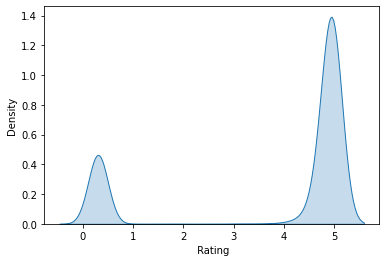

In [21]:

plt.figure()
sns.kdeplot(data=df2[" Rating"], shade=True)
plt.show()

C:\Users\neto\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


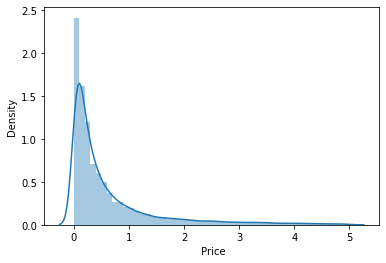

In [22]:

plt.figure()
sns.distplot(df2[" Price"])
plt.show()

In [23]:
#plt.figure()
#sns.barplot(x=' Price', y=' Rating', hue=' Category', data=df2, estimator=np.median)
#plt.show()


**Gráficos de dispersión de seaborn.**

Los gráficos de dispersión se usan para trazar puntos de datos en un eje vertical y uno horizontal, mediante lo que se trata de mostrar cuánto afecta una variable a otra.
Tomado de https://docs.tibco.com/pub/spotfire_web_player/6.0.0-november-2013/es-ES/WebHelp/GUID-780960FA-1DCE-4E59-8EB7-54F7144DB362.html

Con sns.pairplot se muestra una comparativa de cada elemento.

In [24]:

# sns.pairplot(df2);


**Mapa de calor de acuerdo a una correlación.**

Los mapas de calor visualizan los datos a través de variaciones en el color. Cuando se aplican a un formato tabular, los mapas de calor son útiles para el examen cruzado de datos multivariados, mediante la colocación de variables en las filas y columnas, y coloreando las celdas dentro de la tabla. Los mapas de calor son buenos para mostrar la varianza a través de múltiples variables, revelando cualquier patrón, mostrando si las variables son similares entre sí y para detectar si existen correlaciones entre ellas. 
Tomado de https://datavizcatalogue.com/ES/metodos/mapa_de_calor.html

El heatmap creará un gráfico con la correlación de los elementos comparables, se pasa como parámetro df.corr(), el cuál es la correlación del dataset.

Entiéndase correlación como una medida estadística que expresa hasta qué punto dos variables están relacionadas linealmente (esto es, cambian conjuntamente a una tasa constante). Es una herramienta común para describir relaciones simples sin hacer afirmaciones sobre causa y efecto.
Tomado de https://www.jmp.com/es_es/statistics-knowledge-portal/what-is-correlation.html

In [25]:

#_,ax=plt.subplots(figsize=(15,10))
#colormap=sns.diverging_palette(220,10,as_cmap=True)
#sns.heatmap(df.corr(),annot=True,cmap=colormap)